In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

%matplotlib inline

In [4]:
colNames = ['timeStamp', 'ganglionTime', 'c1' ,'c2', 'c3', 'c4', 'a1', 'a2', 'a3']
d = pd.read_csv("../Data/record.csv_2018-11-13_18-21-30.csv", sep=',', names=colNames)

In [14]:
d.head()

,timeStamp,ganglionTime,c1,c2,c3,c4,a1,a2,a3
0,%2018-11-13_18-21-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24.3772079945,0.0,-0.220476,0.156466,0.556708,0.499836,0.0,0.0,0.0
2,24.3779189587,1.0,-0.376655,0.036969,0.479816,0.505762,0.0,0.0,0.0
3,24.3780229092,2.0,-0.313093,0.069650,0.357562,0.282396,0.0,0.0,0.0
4,24.3785510063,3.0,-0.150761,0.221967,0.476542,0.295948,0.0,0.0,0.0


In [15]:
X = np.array(d.ix[250:, 2:6])
sig = X[:, 0]

In [16]:
sig.shape

(5408,)

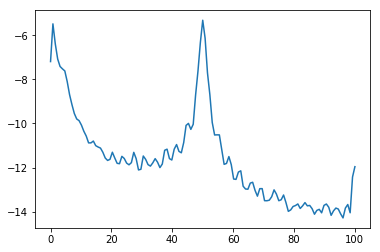

In [17]:
freq, y = signal.welch(sig, fs=200.0)
plt.plot(freq, np.log(y))

In [18]:
b, a = signal.butter(8, (6.5/100.0, 40.0/100), btype='bandpass')
sig_f = signal.lfilter(b, a, sig)[1000:]

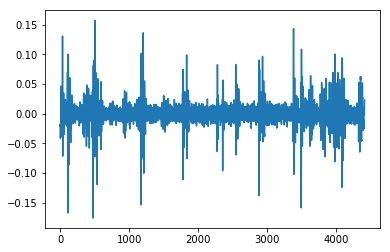

In [19]:
plt.plot(sig_f)

(5, 40)

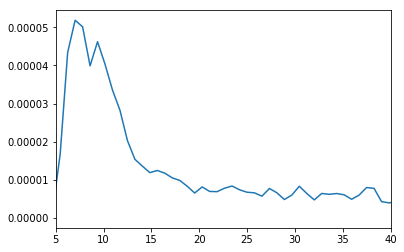

In [20]:
fftfreq, fft = signal.welch(sig_f, fs=200.0)
plt.plot(fftfreq, fft)
plt.xlim(5, 40)

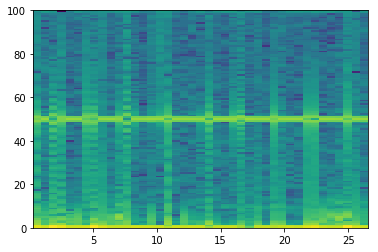

In [21]:
_ = plt.specgram(sig, Fs=200.0)

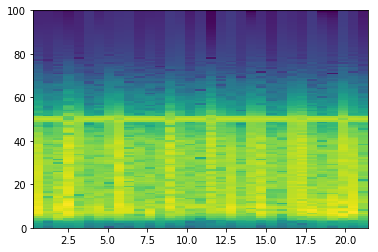

In [22]:
_ = plt.specgram(sig_f, Fs=200.0, NFFT=256, noverlap=128)